In [37]:
LINGUISTIC_NUM_FEATURES = ['sentence_count', 'word_count', 'words_per_sentence', 'average_word_length', 'large_words']
POS_FEATURES = ['ADJ', 'ADP', 'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X']
MATH_NUM_FEATURES = ['no_of_exps', 'no_of_pow', 'symbol_count' ,'mod_count', 'log_count', 'fracs_count', 'eqlts_count', 'neqlts_count', 'max_degree_of_equations', 'number_of_digits', 'number_of_numbers']
TARGET_FEATURE = ['level']
MANDATORY_FEATURES = ['no_of_equations', 'no_of_variables']
MATH_VOCAB_FEATURES = ['number_of_math_vocab']

In [38]:
import pandas as pd
data = pd.read_csv('../Data/final_data.csv', index_col=0)
print(data.shape)
print(data.columns)

(4236, 56)
Index(['problem', 'level', 'type', 'modified_problem', 'no_of_equations',
       'no_of_variables', 'has_mod', 'has_logarithm', 'has_fraction', 'has_eq',
       'has_neq', 'mod_count', 'log_count', 'fracs_count', 'eqlts_count',
       'neqlts_count', 'max_degree_of_equations', 'sentence_count',
       'word_count', 'words_per_sentence', 'average_word_length',
       'large_words', 'has_repeated_large_words', 'ADJ', 'ADP', 'ADV', 'AUX',
       'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART', 'PRON', 'PROPN',
       'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'sentence_count_cat',
       'word_count_cat', 'words_per_sentence_cat', 'average_word_length_cat',
       'large_words_cat', 'number_of_math_vocab', 'number_of_digits',
       'number_of_numbers', 'has_digits', 'has_symbol', 'symbol_count',
       'has_exp', 'no_of_exps', 'has_pow', 'no_of_pow'],
      dtype='object')


In [39]:
data.head()

,problem,level,type,modified_problem,no_of_equations,no_of_variables,has_mod,has_logarithm,has_fraction,has_eq,...,number_of_math_vocab,number_of_digits,number_of_numbers,has_digits,has_symbol,symbol_count,has_exp,no_of_exps,has_pow,no_of_pow
0,Kevin Kangaroo begins hopping on a number line...,Level 5,Algebra,Kevin Kangaroo begins hopping on a number line...,2,1,False,False,True,False,...,2,2,2,True,False,0,False,0,False,0
1,The ratio of the areas of two squares is $\fra...,Level 4,Algebra,The ratio of the areas of two squares is . Aft...,3,5,False,False,True,False,...,4,0,0,False,True,2,False,0,True,1
2,"If $\sqrt{2\sqrt{t-2}} = \sqrt[4]{7 - t}$, the...",Level 4,Algebra,"If , then find .",1,2,False,False,False,False,...,0,4,4,True,True,2,False,0,True,3
3,Let $t(x) = \sqrt{3x+1}$ and $f(x)=5-t(x)$. Wh...,Level 4,Algebra,Let and . What is ?,3,3,False,False,False,False,...,0,1,1,True,False,0,False,0,True,1
4,James has a total of 66 dollars in his piggy b...,Level 2,Algebra,James has a total of 66 dollars in his piggy b...,0,0,False,False,False,False,...,2,0,0,False,False,0,False,0,False,0


In [40]:
data.drop(columns = ['problem', 'modified_problem'], inplace = True)

In [41]:
size_mapping = {"Prealgebra": 1, "Intermediate Algebra": 2, "Algebra": 3}
data['type'] = data['type'].replace(size_mapping)

In [42]:
X = data[LINGUISTIC_NUM_FEATURES + MATH_NUM_FEATURES + MANDATORY_FEATURES + POS_FEATURES + MATH_VOCAB_FEATURES]
y = data['level']

In [43]:
X.shape

(4236, 37)

In [44]:
X.columns

Index(['sentence_count', 'word_count', 'words_per_sentence',
       'average_word_length', 'large_words', 'no_of_exps', 'no_of_pow',
       'symbol_count', 'mod_count', 'log_count', 'fracs_count', 'eqlts_count',
       'neqlts_count', 'max_degree_of_equations', 'number_of_digits',
       'number_of_numbers', 'no_of_equations', 'no_of_variables', 'ADJ', 'ADP',
       'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART',
       'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X',
       'number_of_math_vocab'],
      dtype='object')

## K means-clustering

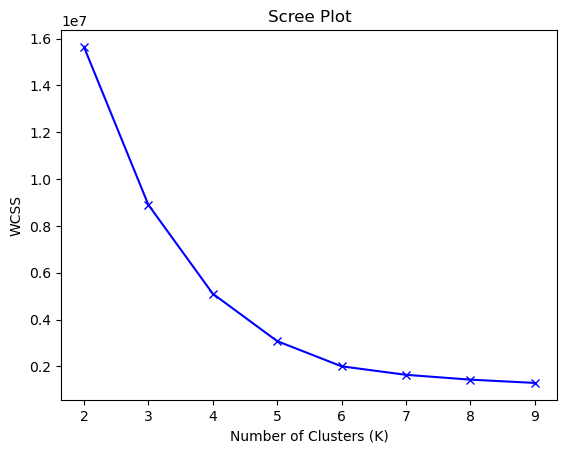

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Perform K-means clustering for different values of K
k_values = range(2, 10)  # Number of clusters
wcss = []  # Within-cluster sum of squares

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Scree Plot')
plt.show()

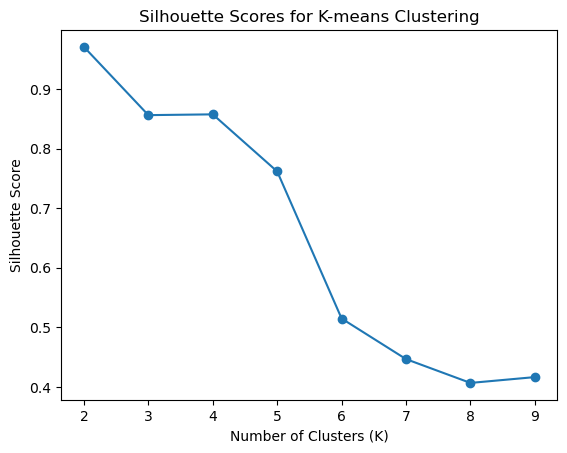

In [46]:
from sklearn.metrics import silhouette_score
silhouette_scores = []  # Silhouette scores
# Perform K-means clustering for different values of K
k_values = range(2, 10)  # Number of clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-means Clustering')
plt.show()

In [47]:
import numpy as np
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Count the number of data points in each cluster
unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)

# Create a dictionary mapping cluster labels to their corresponding counts
cluster_distribution = dict(zip(unique_clusters, cluster_counts))

print(cluster_labels)

[0 0 0 ... 0 0 0]


In [48]:
pd.crosstab(y, pd.Series(cluster_labels))

col_0,0,1,2
level,,,
Level 1,346,3,13
Level 2,818,0,14
Level 3,915,3,25
Level 4,962,4,17
Level 5,1062,6,48


## Spectral Clustering

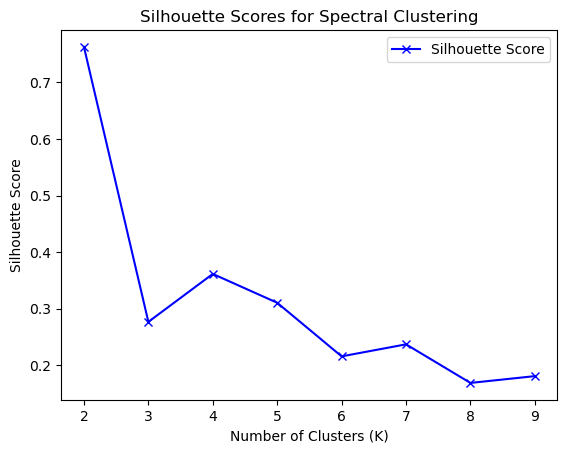

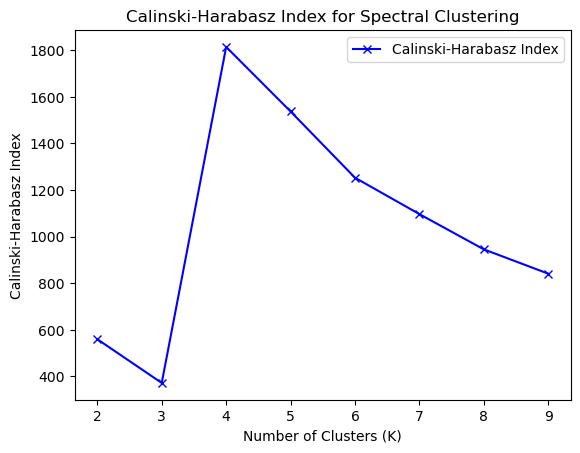

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Perform spectral clustering for different values of K
k_values = range(2, 10)  # Number of clusters
silhouette_scores = []  # Silhouette scores
calinski_scores = []  # Calinski-Harabasz index scores

for k in k_values:
    spectral_clustering = SpectralClustering(n_clusters=k, affinity="nearest_neighbors")
    labels = spectral_clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    calinski_scores.append(calinski_harabasz_score(X, labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, 'bx-', label='Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Spectral Clustering')
plt.legend()
plt.show()

# Plot the Calinski-Harabasz index scores
plt.plot(k_values, calinski_scores, 'bx-', label='Calinski-Harabasz Index')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Spectral Clustering')
plt.legend()
plt.show()


In [50]:
from sklearn.cluster import SpectralClustering

# Create a SpectralClustering object
spectral_clustering = SpectralClustering(
    n_clusters=3,          # Number of clusters to identify
    affinity='nearest_neighbors',   # Affinity matrix computation method (can be 'nearest_neighbors', 'rbf', etc.)
    n_neighbors=10,        # Number of neighbors for the nearest_neighbors affinity option
    assign_labels='kmeans' # Method for assigning labels ('kmeans' or 'discretize')
)

# Fit and predict the clusters
spectral_clusters = spectral_clustering.fit_predict(X)

In [51]:
y1 = pd.Series(spectral_clusters)

In [52]:
pd.crosstab(y, y1)

col_0,0,1,2
level,,,
Level 1,250,13,99
Level 2,528,15,289
Level 3,604,28,311
Level 4,586,23,374
Level 5,584,60,472
